<a href="https://colab.research.google.com/github/GinuraAdikari/InsightHive/blob/Recommendation_Engine/Feature_Extraction_%26_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
import matplotlib.pyplot as plt
import seaborn as sns


import os

In [ ]:
# Load the events data
event_df=pd.read_csv('drive/MyDrive/Colab Notebooks/events.csv')
event_df

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN
...,...,...,...,...,...
2756096,1438398785939,591435,view,261427,NaN
2756097,1438399813142,762376,view,115946,NaN
2756098,1438397820527,1251746,view,78144,NaN
2756099,1438398530703,1184451,view,283392,NaN


In [ ]:
# Load the category tree data
category_tree=pd.read_csv('drive/MyDrive/Colab Notebooks/category_tree.csv')

category_tree.head()

,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0


In [ ]:
# load item-related datasets
item1=pd.read_csv('drive/MyDrive/Colab Notebooks/item_properties_part1.csv')
item2=pd.read_csv('drive/MyDrive/Colab Notebooks/item_properties_part2.csv')

# Combine the item properties dataframes
item_properties = pd.concat([item1, item2])
item_properties.head(10)

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513
5,1436065200000,285026,available,0
6,1434250800000,89534,213,1121373
7,1431831600000,264312,6,319724
8,1433646000000,229370,202,1330310
9,1434250800000,98113,451,1141052 n48.000


In [ ]:
# remove duplicates if any

# Print the number of rows before removing duplicates
print('Number of rows before removing duplicates: ', event_df.shape[0])

# Remove duplicates based on all columns
event_df.drop_duplicates(inplace=True)

# Reset the index
event_df.reset_index(drop=True, inplace=True)

# Print the number of rows after removing duplicates
print('Number of rows after removing duplicates: ', event_df.shape[0])

Number of rows before removing duplicates:  2756101
Number of rows after removing duplicates:  2755641


In [ ]:
event_df['date_time'] = pd.to_datetime(event_df['timestamp'],unit='ms')
event_df['date_time']

,date_time
0,2015-06-02 05:02:12.117
1,2015-06-02 05:50:14.164
2,2015-06-02 05:13:19.827
3,2015-06-02 05:12:35.914
4,2015-06-02 05:02:17.106
...,...
2755636,2015-08-01 03:13:05.939
2755637,2015-08-01 03:30:13.142
2755638,2015-08-01 02:57:00.527
2755639,2015-08-01 03:08:50.703


In [ ]:
#Merge events with item properties and category tree
merged_events = event_df.merge(item_properties,on=['itemid','timestamp'],how='left')
merged_events.head()

,timestamp,visitorid,event,itemid,transactionid,date_time,property,value
0,1433221332117,257597,view,355908,NaN,2015-06-02 05:02:12.117,NaN,NaN
1,1433224214164,992329,view,248676,NaN,2015-06-02 05:50:14.164,NaN,NaN
2,1433221999827,111016,view,318965,NaN,2015-06-02 05:13:19.827,NaN,NaN
3,1433221955914,483717,view,253185,NaN,2015-06-02 05:12:35.914,NaN,NaN
4,1433221337106,951259,view,367447,NaN,2015-06-02 05:02:17.106,NaN,NaN


In [ ]:
merged_events=merged_events.merge(category_tree, left_on='property', right_on='categoryid', how='left')
merged_events.head()

,timestamp,visitorid,event,itemid,transactionid,date_time,property,value,categoryid,parentid
0,1433221332117,257597,view,355908,NaN,2015-06-02 05:02:12.117,NaN,NaN,NaN,NaN
1,1433224214164,992329,view,248676,NaN,2015-06-02 05:50:14.164,NaN,NaN,NaN,NaN
2,1433221999827,111016,view,318965,NaN,2015-06-02 05:13:19.827,NaN,NaN,NaN,NaN
3,1433221955914,483717,view,253185,NaN,2015-06-02 05:12:35.914,NaN,NaN,NaN,NaN
4,1433221337106,951259,view,367447,NaN,2015-06-02 05:02:17.106,NaN,NaN,NaN,NaN


In [ ]:
# Print the first few rows of merged_events to check if the merging is correct
merged_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755641 entries, 0 to 2755640
Data columns (total 10 columns):
 #   Column         Dtype         
---  ------         -----         
 0   timestamp      int64         
 1   visitorid      int64         
 2   event          object        
 3   itemid         int64         
 4   transactionid  float64       
 5   date_time      datetime64[ns]
 6   property       object        
 7   value          object        
 8   categoryid     float64       
 9   parentid       float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 210.2+ MB


   visitorid  itemid  property  parentid
0          0       3         0         0
1          1       1         0         0
2          2       8         0         0
3          3       1         0         0
4          4       1         0         0
          itemid  property  parentid
itemid       1.0       NaN       NaN
property     NaN       NaN       NaN
parentid     NaN       NaN       NaN


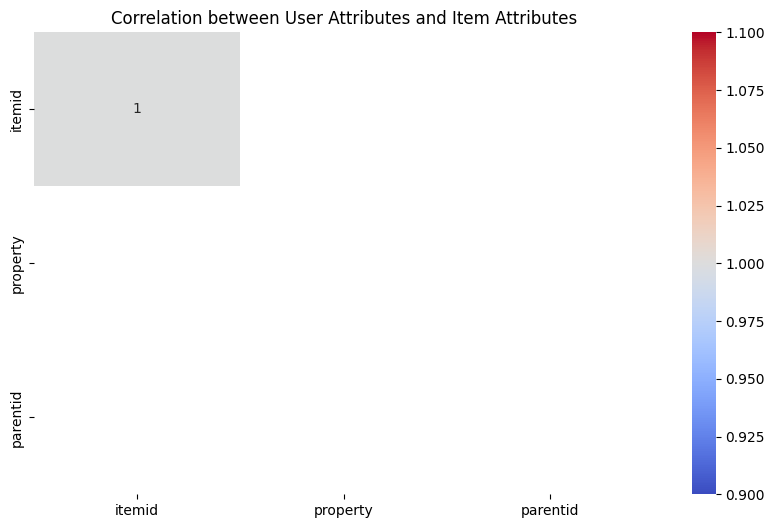

In [ ]:
#Correlation between user attributes and item attributes
user_item_merged = merged_events.groupby('visitorid').agg({
    'itemid': 'count',
    'property': 'nunique',
    'parentid': 'nunique',
})
print(user_item_merged.head().reset_index())

correlation_matrix = user_item_merged.corr()
print(correlation_matrix)

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,annot =True,cmap ='coolwarm')
plt.title('Correlation between User Attributes and Item Attributes')
plt.show()

In [ ]:
#Add-to-cart to transaction conversion rate

add_to_cart = event_df[event_df['event'] == 'addtocart']
transactions = event_df[event_df['event'] == 'transaction']
conversion_rate = len(transactions) / len(add_to_cart)

print(f"Add-to-cart to transaction conversion rate: {conversion_rate:.2%}")

Add-to-cart to transaction conversion rate: 32.56%


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error
#from surprise import Reader,Dataset,SVD
#from surprise.model_selection import cross_validate,GridSearchCV

In [ ]:
df = merged_events.copy()
df.head()

,timestamp,visitorid,event,itemid,transactionid,date_time,property,value,categoryid,parentid
0,1433221332117,257597,view,355908,NaN,2015-06-02 05:02:12.117,NaN,NaN,NaN,NaN
1,1433224214164,992329,view,248676,NaN,2015-06-02 05:50:14.164,NaN,NaN,NaN,NaN
2,1433221999827,111016,view,318965,NaN,2015-06-02 05:13:19.827,NaN,NaN,NaN,NaN
3,1433221955914,483717,view,253185,NaN,2015-06-02 05:12:35.914,NaN,NaN,NaN,NaN
4,1433221337106,951259,view,367447,NaN,2015-06-02 05:02:17.106,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(2755641, 10)

In [ ]:
#lets take sample
np.random.seed(1)

rows_to_keep = np.random.choice(df.index, size=100000, replace=False)
sample_df = df.loc[rows_to_keep]

# Display the sampled DataFrame
sample_df

,timestamp,visitorid,event,itemid,transactionid,date_time,property,value,categoryid,parentid
1502186,1430801768576,1163548,view,182851,NaN,2015-05-05 04:56:08.576,NaN,NaN,NaN,NaN
547399,1435378506816,519492,view,287287,NaN,2015-06-27 04:15:06.816,NaN,NaN,NaN,NaN
2152452,1436078633332,532358,view,347081,NaN,2015-07-05 06:43:53.332,NaN,NaN,NaN,NaN
1508392,1430851366672,1394708,view,354881,NaN,2015-05-05 18:42:46.672,NaN,NaN,NaN,NaN
628172,1438579567615,1174103,view,78887,NaN,2015-08-03 05:26:07.615,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
603512,1435694949972,692135,view,404825,NaN,2015-06-30 20:09:09.972,NaN,NaN,NaN,NaN
751354,1439099414315,722421,view,137144,NaN,2015-08-09 05:50:14.315,NaN,NaN,NaN,NaN
649947,1438624688773,1144723,view,62228,NaN,2015-08-03 17:58:08.773,NaN,NaN,NaN,NaN
2334499,1436820023832,448128,view,260819,NaN,2015-07-13 20:40:23.832,NaN,NaN,NaN,NaN


In [ ]:
print(sample_df.columns)


Index(['timestamp', 'visitorid', 'event', 'itemid', 'transactionid',
       'date_time', 'property', 'value', 'categoryid', 'parentid'],
      dtype='object')


In [ ]:
 #feature engineering
#user_based Feature

user_behavior = sample_df.groupby('visitorid').agg({
    'itemid': 'count',
    'property': 'nunique',       # Using the correct column name 'property'
    'categoryid': 'nunique',     # Using the correct column name 'categoryid'
    'timestamp': ['min', 'max', 'mean']
}).reset_index()


user_behavior.columns = ['visitorid', 'item_count', 'property_count', 'category_count', 'first_interaction', 'last_interaction', 'avg_interaction_time']
user_behavior['time_on_platform'] = user_behavior['last_interaction'] - user_behavior['first_interaction']
user_behavior['time_between_actions'] = user_behavior['time_on_platform'] / (user_behavior['item_count'] - 1)

user_behavior

,visitorid,item_count,property_count,category_count,first_interaction,last_interaction,avg_interaction_time,time_on_platform,time_between_actions
0,2,1,0,0,1438970905669,1438970905669,1.438971e+12,0,NaN
1,6,1,0,0,1440914628202,1440914628202,1.440915e+12,0,NaN
2,88,1,0,0,1442086733371,1442086733371,1.442087e+12,0,NaN
3,120,1,0,0,1436023859041,1436023859041,1.436024e+12,0,NaN
4,137,1,0,0,1433149153810,1433149153810,1.433149e+12,0,NaN
...,...,...,...,...,...,...,...,...,...
87717,1407491,1,0,0,1441657541978,1441657541978,1.441658e+12,0,NaN
87718,1407494,1,0,0,1434394598580,1434394598580,1.434395e+12,0,NaN
87719,1407504,1,0,0,1439656228164,1439656228164,1.439656e+12,0,NaN
87720,1407530,1,0,0,1437964161007,1437964161007,1.437964e+12,0,NaN


In [ ]:
#item_based feature
item_popularity = sample_df.groupby('itemid').agg({
    'visitorid':'count',
     'event': ['nunique',lambda  x : sum(x == 'view'),
              lambda x:sum(x =='addtocart'),
              lambda x:sum(x =='transaction')]
   }).reset_index()

item_popularity.columns=['itemid','user_count','event_count','view_count','addtocart_count','transaction_count']
item_popularity['conversion rate'] = item_popularity['transaction_count']/item_popularity['addtocart_count']
item_popularity

,itemid,user_count,event_count,view_count,addtocart_count,transaction_count,conversion rate
0,3,1,1,1,0,0,NaN
1,6,1,1,1,0,0,NaN
2,15,1,1,0,1,0,0.0
3,19,2,1,2,0,0,NaN
4,32,3,1,3,0,0,NaN
...,...,...,...,...,...,...,...
50079,466857,1,1,1,0,0,NaN
50080,466858,1,1,1,0,0,NaN
50081,466860,1,1,1,0,0,NaN
50082,466861,1,1,1,0,0,NaN


In [ ]:
#user_item interaction feature
user_item_interaction = sample_df.groupby(['visitorid' ,'itemid']).agg({
    'event':'count',
    'timestamp' : ['min' ,'max']
    }).reset_index()
user_item_interaction.columns =['visitorid','itemid' ,'interaction_count','first_interaction','last_interaction']
user_item_interaction['time_between_interaction'] = user_item_interaction['last_interaction'] -user_item_interaction['first_interaction']
user_item_interaction

,visitorid,itemid,interaction_count,first_interaction,last_interaction,time_between_interaction
0,2,342816,1,1438970905669,1438970905669,0
1,6,65273,1,1440914628202,1440914628202,0
2,88,58827,1,1442086733371,1442086733371,0
3,120,153339,1,1436023859041,1436023859041,0
4,137,383819,1,1433149153810,1433149153810,0
...,...,...,...,...,...,...
97972,1407491,445239,1,1441657541978,1441657541978,0
97973,1407494,3125,1,1434394598580,1434394598580,0
97974,1407504,406296,1,1439656228164,1439656228164,0
97975,1407530,455539,1,1437964161007,1437964161007,0


In [ ]:
user_feature=user_behavior.drop(['first_interaction' ,'last_interaction'],axis=1)
item_feature=item_popularity.drop(['view_count','addtocart_count','transaction_count'],axis=1)
user_item_interaction_feature=user_item_interaction.drop(['first_interaction','last_interaction'],axis=1)

#merge the feature into single dataframe, preparing features for a machine learning model by combining information from different DataFrames

features=user_item_interaction_feature.merge(user_feature,on ='visitorid').merge(item_feature, on ='itemid')

In [ ]:
features.head()

,visitorid,itemid,interaction_count,time_between_interaction,item_count,property_count,category_count,avg_interaction_time,time_on_platform,time_between_actions,user_count,event_count,conversion rate
0,2,342816,1,0,1,0,0,1.438971e+12,0,NaN,6,1,NaN
1,6,65273,1,0,1,0,0,1.440915e+12,0,NaN,42,2,0.0
2,88,58827,1,0,1,0,0,1.442087e+12,0,NaN,1,1,NaN
3,120,153339,1,0,1,0,0,1.436024e+12,0,NaN,3,1,NaN
4,137,383819,1,0,1,0,0,1.433149e+12,0,NaN,1,1,NaN


In [ ]:
import random

# Replace infinity values with NaN
features=features.replace([np.inf,-np.inf],np.nan)

# Fill NaN values with the median
features=features.fillna(features.median())
features.head(10)

,visitorid,itemid,interaction_count,time_between_interaction,item_count,property_count,category_count,avg_interaction_time,time_on_platform,time_between_actions,user_count,event_count,conversion rate
0,2,342816,1,0,1,0,0,1.438971e+12,0,40873501.5,6,1,0.0
1,6,65273,1,0,1,0,0,1.440915e+12,0,40873501.5,42,2,0.0
2,88,58827,1,0,1,0,0,1.442087e+12,0,40873501.5,1,1,0.0
3,120,153339,1,0,1,0,0,1.436024e+12,0,40873501.5,3,1,0.0
4,137,383819,1,0,1,0,0,1.433149e+12,0,40873501.5,1,1,0.0
5,144,362964,1,0,1,0,0,1.437440e+12,0,40873501.5,6,1,0.0
6,149,332620,1,0,1,0,0,1.434918e+12,0,40873501.5,5,1,0.0
7,150,452955,1,0,1,0,0,1.433720e+12,0,40873501.5,4,1,0.0
8,155,389974,1,0,1,0,0,1.442033e+12,0,40873501.5,1,1,0.0
9,162,1152,1,0,1,0,0,1.433388e+12,0,40873501.5,9,1,0.0


In [ ]:
# Normalizing interaction_count to the range [0, 1]
features['interaction_count_norm'] = features['interaction_count'] / features['interaction_count'].max()
features.head(10)

,visitorid,itemid,interaction_count,time_between_interaction,item_count,property_count,category_count,avg_interaction_time,time_on_platform,time_between_actions,user_count,event_count,conversion rate,interaction_count_norm
0,2,342816,1,0,1,0,0,1.438971e+12,0,40873501.5,6,1,0.0,0.1
1,6,65273,1,0,1,0,0,1.440915e+12,0,40873501.5,42,2,0.0,0.1
2,88,58827,1,0,1,0,0,1.442087e+12,0,40873501.5,1,1,0.0,0.1
3,120,153339,1,0,1,0,0,1.436024e+12,0,40873501.5,3,1,0.0,0.1
4,137,383819,1,0,1,0,0,1.433149e+12,0,40873501.5,1,1,0.0,0.1
5,144,362964,1,0,1,0,0,1.437440e+12,0,40873501.5,6,1,0.0,0.1
6,149,332620,1,0,1,0,0,1.434918e+12,0,40873501.5,5,1,0.0,0.1
7,150,452955,1,0,1,0,0,1.433720e+12,0,40873501.5,4,1,0.0,0.1
8,155,389974,1,0,1,0,0,1.442033e+12,0,40873501.5,1,1,0.0,0.1
9,162,1152,1,0,1,0,0,1.433388e+12,0,40873501.5,9,1,0.0,0.1


In [ ]:
# Calculate item popularity score
features['item_popularity_score'] = features['user_count'] * features['event_count']
# Normalize 'item_popularity_score'
features['item_popularity_score_norm'] = features['item_popularity_score'] / features['item_popularity_score'].max()


In [ ]:
# Dropping 'user_count' and 'interaction_count' columns
features = features.drop(columns=['user_count', 'interaction_count','item_popularity_score'])



   visitorid  itemid  time_between_interaction  item_count  property_count  \
0          2  342816                         0           1               0   
1          6   65273                         0           1               0   
2         88   58827                         0           1               0   
3        120  153339                         0           1               0   
4        137  383819                         0           1               0   

   category_count  avg_interaction_time  time_on_platform  \
0               0          1.438971e+12                 0   
1               0          1.440915e+12                 0   
2               0          1.442087e+12                 0   
3               0          1.436024e+12                 0   
4               0          1.433149e+12                 0   

   time_between_actions  event_count  conversion rate  interaction_count_norm  \
0            40873501.5            1              0.0                     0.1   
1 

In [ ]:
features.head()

,visitorid,itemid,time_between_interaction,item_count,property_count,category_count,avg_interaction_time,time_on_platform,time_between_actions,event_count,conversion rate,interaction_count_norm,item_popularity_score_norm
0,2,342816,0,1,0,0,1.438971e+12,0,40873501.5,1,0.0,0.1,0.019048
1,6,65273,0,1,0,0,1.440915e+12,0,40873501.5,2,0.0,0.1,0.266667
2,88,58827,0,1,0,0,1.442087e+12,0,40873501.5,1,0.0,0.1,0.003175
3,120,153339,0,1,0,0,1.436024e+12,0,40873501.5,1,0.0,0.1,0.009524
4,137,383819,0,1,0,0,1.433149e+12,0,40873501.5,1,0.0,0.1,0.003175


In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97977 entries, 0 to 97976
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   visitorid                   97977 non-null  int64  
 1   itemid                      97977 non-null  int64  
 2   time_between_interaction    97977 non-null  int64  
 3   item_count                  97977 non-null  int64  
 4   property_count              97977 non-null  int64  
 5   category_count              97977 non-null  int64  
 6   avg_interaction_time        97977 non-null  float64
 7   time_on_platform            97977 non-null  int64  
 8   time_between_actions        97977 non-null  float64
 9   event_count                 97977 non-null  int64  
 10  conversion rate             97977 non-null  float64
 11  interaction_count_norm      97977 non-null  float64
 12  item_popularity_score_norm  97977 non-null  float64
dtypes: float64(5), int64(8)
memory 

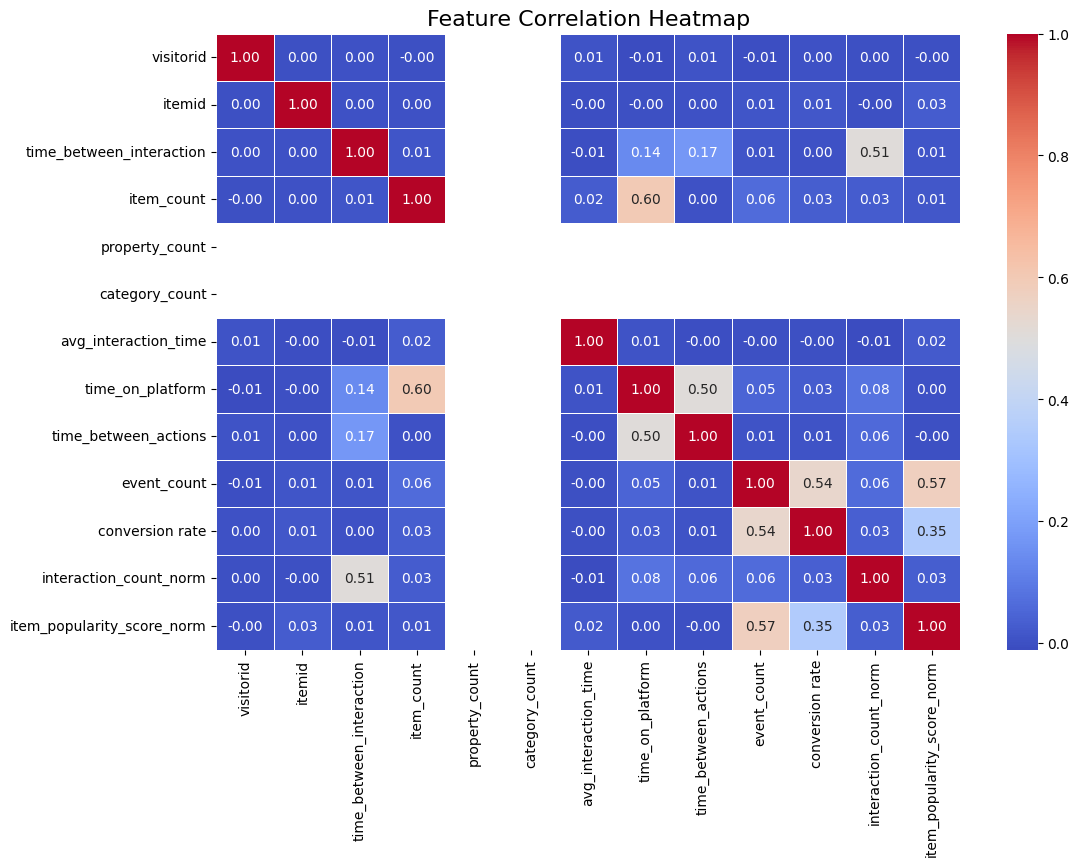

In [ ]:
# Compute the correlation matrix
correlation_matrix = features.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title
plt.title('Feature Correlation Heatmap', fontsize=16)

# Show plot
plt.show()